In [ ]:
"""
Prep StyleGAN2 and produce tfrecords for training -> Images MUST be square, power of 2, and same size..

This will be a quick notebook to resize all beetle images to 1024x1024 while maintaining the beetle shape

"""

In [12]:
# list all image directories here 

image01 = '/home/jovyan/work/beetleData/images/beetleClean/clean/'
image02 = '/home/jovyan/work/beetleData/images/rbiImages/'

image_OUT = '/home/jovyan/work/beetleData/images/miniprep/images/'

dim = (256, 256)

In [13]:
import cv2
import numpy
import matplotlib.pyplot as plt
import os
import numpy as np

In [14]:
atlas_images = os.listdir(image01)

In [15]:
atlas_images[0]

'1083_0.jpg'

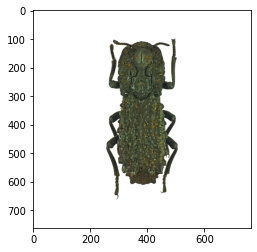

In [34]:
plt.imshow(dst)

In [17]:
IMAGE_DIR = [image01]

for i in IMAGE_DIR:
    atlas_images = os.listdir(i)
    for PIC in np.arange(len(atlas_images)):
        FILENAME = atlas_images[PIC]
        print(FILENAME)
        if 'jpg' in FILENAME:
            print('pass')
            img = cv2.imread(i+FILENAME)
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            height, width = img.shape[:2]

            #plt.imshow(img)

            diff = abs(height-width)
            if height>width:
                #increase left and right
                if diff % 2 > 0:
                    left = diff/2 - .5
                    right = diff/2 + .5
                    bottom = 0
                    top = 0
                else:
                    left = diff/2
                    right = diff/2
                    bottom = 0
                    top = 0
            elif width>height:
                #increase top and bottom
                if diff % 2 > 0:
                    left = 0
                    right = 0
                    top = diff/2 + .5
                    bottom = diff/2 - .5
                else:
                    left = 0
                    right = 0
                    top = diff/2
                    bottom = diff/2

            dst = cv2.copyMakeBorder(img,int(top), int(bottom), int(left), int(right), borderType=cv2.BORDER_CONSTANT, value = [255,255,255])
            assert dst.shape[0] == dst.shape[1], 'shape is funky'
            #plt.imshow(dst)
            resized = cv2.resize(dst, dim, interpolation = cv2.INTER_AREA) 
            cv2.imwrite(image_OUT + FILENAME, cv2.cvtColor(resized,cv2.COLOR_BGR2RGB))


1083_0.jpg
pass
589_0.jpg
pass
210_0.jpg
pass
95_0.jpg
pass
80_1.jpg
pass
1011_0.jpg
pass
1238_1.jpg
pass
356_0.jpg
pass
1164_0.jpg
pass
1154_0.jpg
pass
996_1.jpg
pass
645_2.jpg
pass
149_0.jpg
pass
1238_0.jpg
pass
43_0.jpg
pass
686_0.jpg
pass
1524_0.jpg
pass
1452_0.jpg
pass
1284_1.jpg
pass
1398_0.jpg
pass
1187_0.jpg
pass
667_0.jpg
pass
1533_1.jpg
pass
876_0.jpg
pass
1361_0.jpg
pass
290_0.jpg
pass
1431_0.jpg
pass
1678_0.jpg
pass
222_1.jpg
pass
714_0.jpg
pass
468_1.jpg
pass
427_0.jpg
pass
1619_1.jpg
pass
125_0.jpg
pass
373_0.jpg
pass
1409_0.jpg
pass
1255_0.jpg
pass
351_1.jpg
pass
1597_1.jpg
pass
518_0.jpg
pass
654_0.jpg
pass
1496_0.jpg
pass
454_0.jpg
pass
1205_0.jpg
pass
1357_0.jpg
pass
515_2.jpg
pass
637_0.jpg
pass
690_0.jpg
pass
793_0.jpg
pass
117_0.jpg
pass
820_0.jpg
pass
758_5.jpg
pass
1422_0.jpg
pass
995_0.jpg
pass
401_0.jpg
pass
781_0.jpg
pass
496_1.jpg
pass
52_0.jpg
pass
461_3.jpg
pass
1117_0.jpg
pass
743_1.jpg
pass
539_0.jpg
pass
1574_0.jpg
pass
1147_0.jpg
pass
991_0.jpg
pass
356

In [18]:
import pandas as pd

In [20]:
image_dir = '/home/jovyan/work/beetleData/images/'
label_csv = '/home/jovyan/work/beetleData/labels/master_rbi.csv'
labels = pd.read_csv(label_csv)
dorsal_data = labels[labels["View:"] == "Dorsal"] #filter images that are from dorsal view


In [21]:
dorsal_data.head()

,Family:,Subfamily:,Country:,Province:,Genus:,Species:,View:,Filename:
0,Anthribidae,/,Equatorial Guinea,/,Phaeotragus,gigas,Dorsal,rbi_1.jpg
2,Anthribidae,/,Madagascar,/,Tophroderes,phrenatus,Dorsal,rbi_3.jpg
3,Brentidae,/,Indonesia,Sumatra,Eutrachelus,temmincki,Dorsal,rbi_4.jpg
4,Brentidae,/,Indonesia,Sumatra,Eutrachelus,temmincki,Dorsal,rbi_5.jpg
6,Buprestidae,/,Uzbekistan,/,Aaata,finchi,Dorsal,rbi_7.jpg


In [22]:
filenames = dorsal_data['Filename:']

In [23]:
filenames

0          rbi_1.jpg
2          rbi_3.jpg
3          rbi_4.jpg
4          rbi_5.jpg
6          rbi_7.jpg
            ...     
4066    rbi_4242.jpg
4068    rbi_4244.jpg
4069    rbi_4245.jpg
4070    rbi_4246.jpg
4073    rbi_4249.jpg
Name: Filename:, Length: 2982, dtype: object

In [24]:
IMAGE_DIR = [image02]

for i in IMAGE_DIR:
    atlas_images = filenames
    for PIC in atlas_images:
        FILENAME = PIC
        print(FILENAME)
        if 'jpg' in FILENAME:
            print('pass')
            img = cv2.imread(i+FILENAME)
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            height, width = img.shape[:2]

            #plt.imshow(img)

            diff = abs(height-width)
            if height>width:
                #increase left and right
                if diff % 2 > 0:
                    left = diff/2 - .5
                    right = diff/2 + .5
                    bottom = 0
                    top = 0
                else:
                    left = diff/2
                    right = diff/2
                    bottom = 0
                    top = 0
            elif width>height:
                #increase top and bottom
                if diff % 2 > 0:
                    left = 0
                    right = 0
                    top = diff/2 + .5
                    bottom = diff/2 - .5
                else:
                    left = 0
                    right = 0
                    top = diff/2
                    bottom = diff/2

            dst = cv2.copyMakeBorder(img,int(top), int(bottom), int(left), int(right), borderType=cv2.BORDER_CONSTANT, value = [255,255,255])
            assert dst.shape[0] == dst.shape[1], 'shape is funky'
            #plt.imshow(dst)
            resized = cv2.resize(dst, dim, interpolation = cv2.INTER_AREA) 
            cv2.imwrite(image_OUT + FILENAME, cv2.cvtColor(resized,cv2.COLOR_BGR2RGB))


rbi_1.jpg
pass
rbi_3.jpg
pass
rbi_4.jpg
pass
rbi_5.jpg
pass
rbi_7.jpg
pass
rbi_9.jpg
pass
rbi_10.jpg
pass
rbi_12.jpg
pass
rbi_13.jpg
pass
rbi_14.jpg
pass
rbi_15.jpg
pass
rbi_17.jpg
pass
rbi_247.jpg
pass
rbi_21.jpg
pass
rbi_23.jpg
pass
rbi_25.jpg
pass
rbi_26.jpg
pass
rbi_29.jpg
pass
rbi_31.jpg
pass
rbi_33.jpg
pass
rbi_35.jpg
pass
rbi_37.jpg
pass
rbi_40.jpg
pass
rbi_41.jpg
pass
rbi_44.jpg
pass
rbi_45.jpg
pass
rbi_47.jpg
pass
rbi_49.jpg
pass
rbi_50.jpg
pass
rbi_53.jpg
pass
rbi_56.jpg
pass
rbi_57.jpg
pass
rbi_58.jpg
pass
rbi_59.jpg
pass
rbi_60.jpg
pass
rbi_61.jpg
pass
rbi_62.jpg
pass
rbi_63.jpg
pass
rbi_64.jpg
pass
rbi_65.jpg
pass
rbi_67.jpg
pass
rbi_68.jpg
pass
rbi_69.jpg
pass
rbi_71.jpg
pass
rbi_72.jpg
pass
rbi_74.jpg
pass
rbi_75.jpg
pass
rbi_76.jpg
pass
rbi_77.jpg
pass
rbi_79.jpg
pass
rbi_81.jpg
pass
rbi_82.jpg
pass
rbi_83.jpg
pass
rbi_84.jpg
pass
rbi_86.jpg
pass
rbi_87.jpg
pass
rbi_88.jpg
pass
rbi_89.jpg
pass
rbi_90.jpg
pass
rbi_91.jpg
pass
rbi_92.jpg
pass
rbi_93.jpg
pass
rbi_94.jpg
pa

In [26]:
os.getcwd()

'/home/jovyan/work/github/beetle-vision'

In [27]:
!cd ..

In [28]:
!pwd

/home/jovyan/work/github/beetle-vision


In [29]:
os.chdir('..')

In [30]:
os.getcwd()

'/home/jovyan/work/github'

In [31]:
os.chdir('./stylegan2-ada/')

In [32]:
!python dataset_tool.py create_from_images /home/jovyan/work/beetleData/images/miniprep/ /home/jovyan/work/beetleData/images/miniprep/images

2020-11-01 11:37:03.326048: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Traceback (most recent call last):
  File "dataset_tool.py", line 21, in <module>
    import dnnlib.tflib as tflib
  File "/home/jovyan/work/github/stylegan2-ada/dnnlib/tflib/__init__.py", line 9, in <module>
    from . import autosummary
  File "/home/jovyan/work/github/stylegan2-ada/dnnlib/tflib/autosummary.py", line 32, in <module>
    from . import tfutil
  File "/home/jovyan/work/github/stylegan2-ada/dnnlib/tflib/tfutil.py", line 18, in <module>
    import tensorflow.contrib   # requires TensorFlow 1.x!
ModuleNotFoundError: No module named 'tensorflow.contrib'
Exception ignored in: <bound method Buckets.__del__ of <tensorflow.python.eager.monitoring.ExponentialBuckets object at 0x7f90687d5f18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/eager/monitoring.py", line 407, in __del__
At

In [33]:
# python dataset_tool.py create_from_images ~/beetleData/images/miniprep/records/ ~/beetleData/images/miniprep/images/
# in a proper conda environment for tensorflow 1.14